In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import polars as pl
import matplotlib.pyplot as plt
from matplotlib import pyplot

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [3]:
# import all lagged data
df_lagged_added_stats_sa199m2e = pd.read_csv('sa199m2e_new_newest_lagged_added_stats.csv')
df_lagged_added_stats_sa196m2e = pd.read_csv('sa196m2e_new_newest_lagged_added_stats.csv')
df_lagged_added_stats_sa196m1e = pd.read_csv('sa196m1e_new_newest_lagged_added_stats.csv')
df_lagged_added_stats_sa198m2e = pd.read_csv('sa198m2e_new_newest_lagged_added_stats.csv')
df_lagged_added_stats_sa196m3e = pd.read_csv('sa196m3e_new_newest_lagged_added_stats.csv')
df_lagged_added_stats_sa199m3e = pd.read_csv('sa199m3e_new_newest_lagged_added_stats.csv')
df_lagged_added_stats_sa199m1e = pd.read_csv('sa199m1e_new_newest_lagged_added_stats.csv')
df_lagged_added_stats_sa78m1 = pd.read_csv('sa78m1_new_newest_lagged_added_stats.csv')
df_lagged_added_stats_sa78m3 = pd.read_csv('sa78m3_new_newest_lagged_added_stats.csv')
df_lagged_added_stats_sa78m5 = pd.read_csv('sa78m5_new_newest_lagged_added_stats.csv')

In [4]:
grouped_lagged_added_stats = pd.concat([df_lagged_added_stats_sa199m2e,df_lagged_added_stats_sa196m2e,
df_lagged_added_stats_sa196m1e,df_lagged_added_stats_sa198m2e,df_lagged_added_stats_sa196m3e,df_lagged_added_stats_sa199m3e,
df_lagged_added_stats_sa199m1e,df_lagged_added_stats_sa78m1,df_lagged_added_stats_sa78m3,df_lagged_added_stats_sa78m5]).iloc[:,1:]

In [6]:
grouped_lagged_added_stats_ri = grouped_lagged_added_stats.reset_index(drop=True)

# only consider classification 3 vs 4 vs 5

In [14]:
grouped_lagged_added_stats_ri_3_4_5 = grouped_lagged_added_stats_ri.iloc[:,:][grouped_lagged_added_stats_ri['Choice Output']>2]

In [16]:
grouped_lagged_added_stats_ri_3_4_5.columns[-100:]

Index(['lagged_1_other_tortuosity', 'lagged_2_other_tortuosity',
       'lagged_3_other_tortuosity', 'lagged_4_other_tortuosity',
       'Exit Latency', 'lagged_1_exit_lat', 'lagged_2_exit_lat',
       'lagged_3_exit_lat', 'lagged_4_exit_lat', 'Exit Latency Nose Movement',
       'lagged_1_exit_lat_nose_mov', 'lagged_2_exit_lat_nose_mov',
       'lagged_3_exit_lat_nose_mov', 'lagged_4_exit_lat_nose_mov',
       'Exit Latency Nose Velocity', 'lagged_1_exit_lat_nose_vel',
       'lagged_2_exit_lat_nose_vel', 'lagged_3_exit_lat_nose_vel',
       'lagged_4_exit_lat_nose_vel', 'Exit Latency Tail Movement',
       'lagged_1_exit_lat_tail_mov', 'lagged_2_exit_lat_tail_mov',
       'lagged_3_exit_lat_tail_mov', 'lagged_4_exit_lat_tail_mov',
       'Exit Latency Tail Velocity', 'lagged_1_exit_lat_tail_vel',
       'lagged_2_exit_lat_tail_vel', 'lagged_3_exit_lat_tail_vel',
       'lagged_4_exit_lat_tail_vel', 'ExitMid Duration',
       'lagged_1_exitmid_duration', 'lagged_2_exitmid_duration',
 

In [23]:
x_main_3_4_5 = grouped_lagged_added_stats_ri_3_4_5.drop(columns = ['Choice Output', 'Duration', 'Exit Latency', 
        'Nose Max Distance', 'Nose Time to Max Dist', 'Tail Base Max Distance', 'Tail Base Time to Max Dist', 'Entry Tortuosity', 'Exit Tortuosity',
        'Other Tortuosity', 'Arm Nose Movement', 'Arm Nose Velocity', 'Arm Tail Movement', 'Arm Tail Velocity',
       
       'Lagged 1 Cur Coeff', 'lagged_1_lagged_1_cur_coeff',
       'lagged_2_lagged_1_cur_coeff', 'lagged_3_lagged_1_cur_coeff',
       'lagged_4_lagged_1_cur_coeff',
       'lagged_1_lagged_2_cur_coeff', 'lagged_2_lagged_2_cur_coeff',
       'lagged_3_lagged_2_cur_coeff', 'lagged_4_lagged_2_cur_coeff',
       'lagged_1_lagged_3_cur_coeff',
       'lagged_2_lagged_3_cur_coeff', 'lagged_3_lagged_3_cur_coeff',
       'lagged_4_lagged_3_cur_coeff', 
       'lagged_1_lagged_4_cur_coeff', 'lagged_2_lagged_4_cur_coeff',
       'lagged_3_lagged_4_cur_coeff', 'lagged_4_lagged_4_cur_coeff',
       
       
       'lagged_1_lagged_1_cur_coeff_time_prop',
       'lagged_2_lagged_1_cur_coeff_time_prop',
       'lagged_3_lagged_1_cur_coeff_time_prop',
       'lagged_4_lagged_1_cur_coeff_time_prop',
       
       'lagged_1_lagged_2_cur_coeff_time_prop',
       'lagged_2_lagged_2_cur_coeff_time_prop',
       'lagged_3_lagged_2_cur_coeff_time_prop',
       'lagged_4_lagged_2_cur_coeff_time_prop',
       
       'lagged_1_lagged_3_cur_coeff_time_prop',
       'lagged_2_lagged_3_cur_coeff_time_prop',
       'lagged_3_lagged_3_cur_coeff_time_prop',
       'lagged_4_lagged_3_cur_coeff_time_prop',
       
       'lagged_1_lagged_4_cur_coeff_time_prop',
       'lagged_2_lagged_4_cur_coeff_time_prop',
       'lagged_3_lagged_4_cur_coeff_time_prop',
       'lagged_4_lagged_4_cur_coeff_time_prop',
                                                                                                             
                                                                                                             
        'lagged_1_lagged_1_cur_coeff_time_prop',
       'lagged_2_lagged_1_cur_coeff_time_prop','lagged_3_lagged_1_cur_coeff_time_prop','lagged_4_lagged_1_cur_coeff_time_prop',
       'lagged_1_lagged_2_cur_coeff_time_prop','lagged_2_lagged_2_cur_coeff_time_prop','lagged_3_lagged_2_cur_coeff_time_prop',
       'lagged_4_lagged_2_cur_coeff_time_prop','lagged_1_lagged_3_cur_coeff_time_prop','lagged_2_lagged_3_cur_coeff_time_prop',
       'lagged_3_lagged_3_cur_coeff_time_prop','lagged_4_lagged_3_cur_coeff_time_prop','lagged_1_lagged_4_cur_coeff_time_prop',
       'lagged_2_lagged_4_cur_coeff_time_prop','lagged_3_lagged_4_cur_coeff_time_prop','lagged_4_lagged_4_cur_coeff_time_prop', 
        'Turn', 'lagged_1_turn_ago', 'lagged_2_turn_ago', 'lagged_3_turn_ago', 'lagged_4_turn_ago', 
        '2_cur_arm_duration', '3_cur_arm_duration', '4_cur_arm_duration',
       '5_cur_arm_duration', 'mean_2_cur_arm_duration',
       'mean_3_cur_arm_duration', 'mean_4_cur_arm_duration',
       'mean_5_cur_arm_duration', '2_past_arm_duration', '3_past_arm_duration',
       '4_past_arm_duration', 'mean_2_past_arm_duration',
       'mean_3_past_arm_duration', 'mean_4_past_arm_duration',
       '2_past_mid_duration', '3_past_mid_duration', '4_past_mid_duration',
       '5_past_mid_duration', 'mean_2_past_mid_duration',
       'mean_3_past_mid_duration', 'mean_4_past_mid_duration',
       'mean_5_past_mid_duration', '2_past_exitmid_duration',
       '3_past_exitmid_duration', '4_past_exitmid_duration',
       '5_past_exitmid_duration', 'mean_2_past_exitmid_duration',
       'mean_3_past_exitmid_duration', 'mean_4_past_exitmid_duration',
       'mean_5_past_exitmid_duration', '2_past_midentry_duration',
       '3_past_midentry_duration', '4_past_midentry_duration',
       '5_past_midentry_duration', 'mean_2_past_midentry_duration',
       'mean_3_past_midentry_duration', 'mean_4_past_midentry_duration',
       'mean_5_past_midentry_duration', '2_past_exitmidentry_duration',
       '3_past_exitmidentry_duration', '4_past_exitmidentry_duration',
       '5_past_exitmidentry_duration', 'mean_2_past_exitmidentry_duration',
       'mean_3_past_exitmidentry_duration',
       'mean_4_past_exitmidentry_duration',
       'mean_5_past_exitmidentry_duration',
                                                                                                               
        'lagged_1_choice_ago', 'lagged_2_choice_ago', 'lagged_3_choice_ago',
       'lagged_4_choice_ago',
        'lagged_1_new_lagged_1_cur_coeff',
        'lagged_2_new_lagged_1_cur_coeff', 
        'lagged_3_new_lagged_1_cur_coeff','lagged_4_new_lagged_1_cur_coeff','lagged_1_new_lagged_2_cur_coeff', 'lagged_2_new_lagged_2_cur_coeff', 
        'lagged_3_new_lagged_2_cur_coeff', 'lagged_4_new_lagged_2_cur_coeff','lagged_1_new_lagged_3_cur_coeff','lagged_2_new_lagged_3_cur_coeff', 
        'lagged_3_new_lagged_3_cur_coeff','lagged_4_new_lagged_3_cur_coeff','lagged_1_new_lagged_4_cur_coeff', 'lagged_2_new_lagged_4_cur_coeff',
        'lagged_3_new_lagged_4_cur_coeff', 'lagged_4_new_lagged_4_cur_coeff','lagged_1_new_lagged_1_cur_coeff_time_prop',
       'lagged_2_new_lagged_1_cur_coeff_time_prop','lagged_3_new_lagged_1_cur_coeff_time_prop','lagged_4_new_lagged_1_cur_coeff_time_prop',
       'lagged_1_new_lagged_2_cur_coeff_time_prop','lagged_2_new_lagged_2_cur_coeff_time_prop','lagged_3_new_lagged_2_cur_coeff_time_prop',
       'lagged_4_new_lagged_2_cur_coeff_time_prop','lagged_1_new_lagged_3_cur_coeff_time_prop','lagged_2_new_lagged_3_cur_coeff_time_prop',
       'lagged_3_new_lagged_3_cur_coeff_time_prop','lagged_4_new_lagged_3_cur_coeff_time_prop','lagged_1_new_lagged_4_cur_coeff_time_prop',
       'lagged_2_new_lagged_4_cur_coeff_time_prop','lagged_3_new_lagged_4_cur_coeff_time_prop','lagged_4_new_lagged_4_cur_coeff_time_prop',
        'Exit Latency Nose Movement', 'Exit Latency Nose Velocity', 'Exit Latency Tail Movement', 'Exit Latency Tail Velocity'])

In [41]:
x_main_3_4_5.head()

,Middle Duration,lagged_1_mid_duration,lagged_2_mid_duration,lagged_3_mid_duration,lagged_4_mid_duration,Middle Nose Movement,lagged_1_mid_nose_mov,lagged_2_mid_nose_mov,lagged_3_mid_nose_mov,lagged_4_mid_nose_mov,...,MidEntry Duration,lagged_1_midentry_duration,lagged_2_midentry_duration,lagged_3_midentry_duration,lagged_4_midentry_duration,ExitMidEntry Duration,lagged_1_exitmidentry_duration,lagged_2_exitmidentry_duration,lagged_3_exitmidentry_duration,lagged_4_exitmidentry_duration
0,0.395349,0.279070,0.441860,0.000000,0.000000,0.499066,0.443050,0.375489,0.000000,0.000000,...,0.472727,0.454545,0.581818,0.290909,0.000000,0.472222,0.472222,0.611111,0.430556,0.000000
1,0.302326,0.395349,0.279070,0.441860,0.000000,0.291543,0.499066,0.443050,0.375489,0.000000,...,0.418182,0.472727,0.454545,0.581818,0.290909,0.444444,0.472222,0.472222,0.611111,0.430556
2,0.279070,0.302326,0.395349,0.279070,0.441860,0.239721,0.291543,0.499066,0.443050,0.375489,...,0.509091,0.418182,0.472727,0.454545,0.581818,0.500000,0.444444,0.472222,0.472222,0.611111
3,0.139535,0.279070,0.302326,0.395349,0.279070,0.226293,0.239721,0.291543,0.499066,0.443050,...,0.381818,0.509091,0.418182,0.472727,0.454545,0.430556,0.500000,0.444444,0.472222,0.472222
4,0.139535,0.139535,0.279070,0.302326,0.395349,0.212414,0.226293,0.239721,0.291543,0.499066,...,0.672727,0.381818,0.509091,0.418182,0.472727,0.652778,0.430556,0.500000,0.444444,0.472222


In [26]:
x_345 = x_main_3_4_5.values

In [27]:
y_345 = grouped_lagged_added_stats_ri_3_4_5['Choice Output'].values

In [28]:
X_train345, X_test345, y_train345, y_test345 = train_test_split(x_345, y_345, test_size=0.2, random_state=42)

In [29]:
mod =  GradientBoostingClassifier(n_estimators=100, learning_rate = 0.1, validation_fraction=0.1, n_iter_no_change=10, random_state=42)
mod.fit(X_train345, y_train345)
y_pred345=mod.predict(X_test345)

In [40]:
mod.n_estimators_

11

In [34]:
target_names = ['3', '4', '5']

In [30]:
f1_sc345 = f1_score(y_test345, y_pred345, average = 'weighted')
f1_sc345

0.6013027852650495

In [31]:
p_sc345 = precision_score(y_test345, y_pred345, average = 'weighted')
p_sc345

0.6217031047219727

In [32]:
cf_matrix345 = confusion_matrix(y_test345, y_pred345)
cf_matrix345

array([[10,  4,  1],
       [ 9, 19,  1],
       [ 2,  4,  3]], dtype=int64)

In [35]:
print(classification_report(y_test345, y_pred345, target_names=target_names))

              precision    recall  f1-score   support

           3       0.48      0.67      0.56        15
           4       0.70      0.66      0.68        29
           5       0.60      0.33      0.43         9

    accuracy                           0.60        53
   macro avg       0.59      0.55      0.55        53
weighted avg       0.62      0.60      0.60        53



In [36]:
from sklearn.inspection import permutation_importance

In [37]:
def plot_permutation_importance(clf, X, y, col, ax):
    result = permutation_importance(clf, X, y, n_repeats=30, random_state=0, n_jobs=2)
    perm_sorted_idx = result.importances_mean.argsort()

    # `labels` argument in boxplot is deprecated in matplotlib 3.9 and has been
    # renamed to `tick_labels`. The following code handles this, but as a
    # scikit-learn user you probably can write simpler code by using `labels=...`
    # (matplotlib < 3.9) or `tick_labels=...` (matplotlib >= 3.9).
    tick_labels_parameter_name = (
        "tick_labels"
        #if parse_version(matplotlib.__version__) >= parse_version("3.9")
        #else "labels"
    )
    tick_labels_dict = {tick_labels_parameter_name: col.columns[perm_sorted_idx]}
    ax.boxplot(result.importances[perm_sorted_idx].T, vert=False)
    ax.set_yticklabels(col.columns[perm_sorted_idx])
    ax.axvline(x=0, color="k", linestyle="--")
    return ax

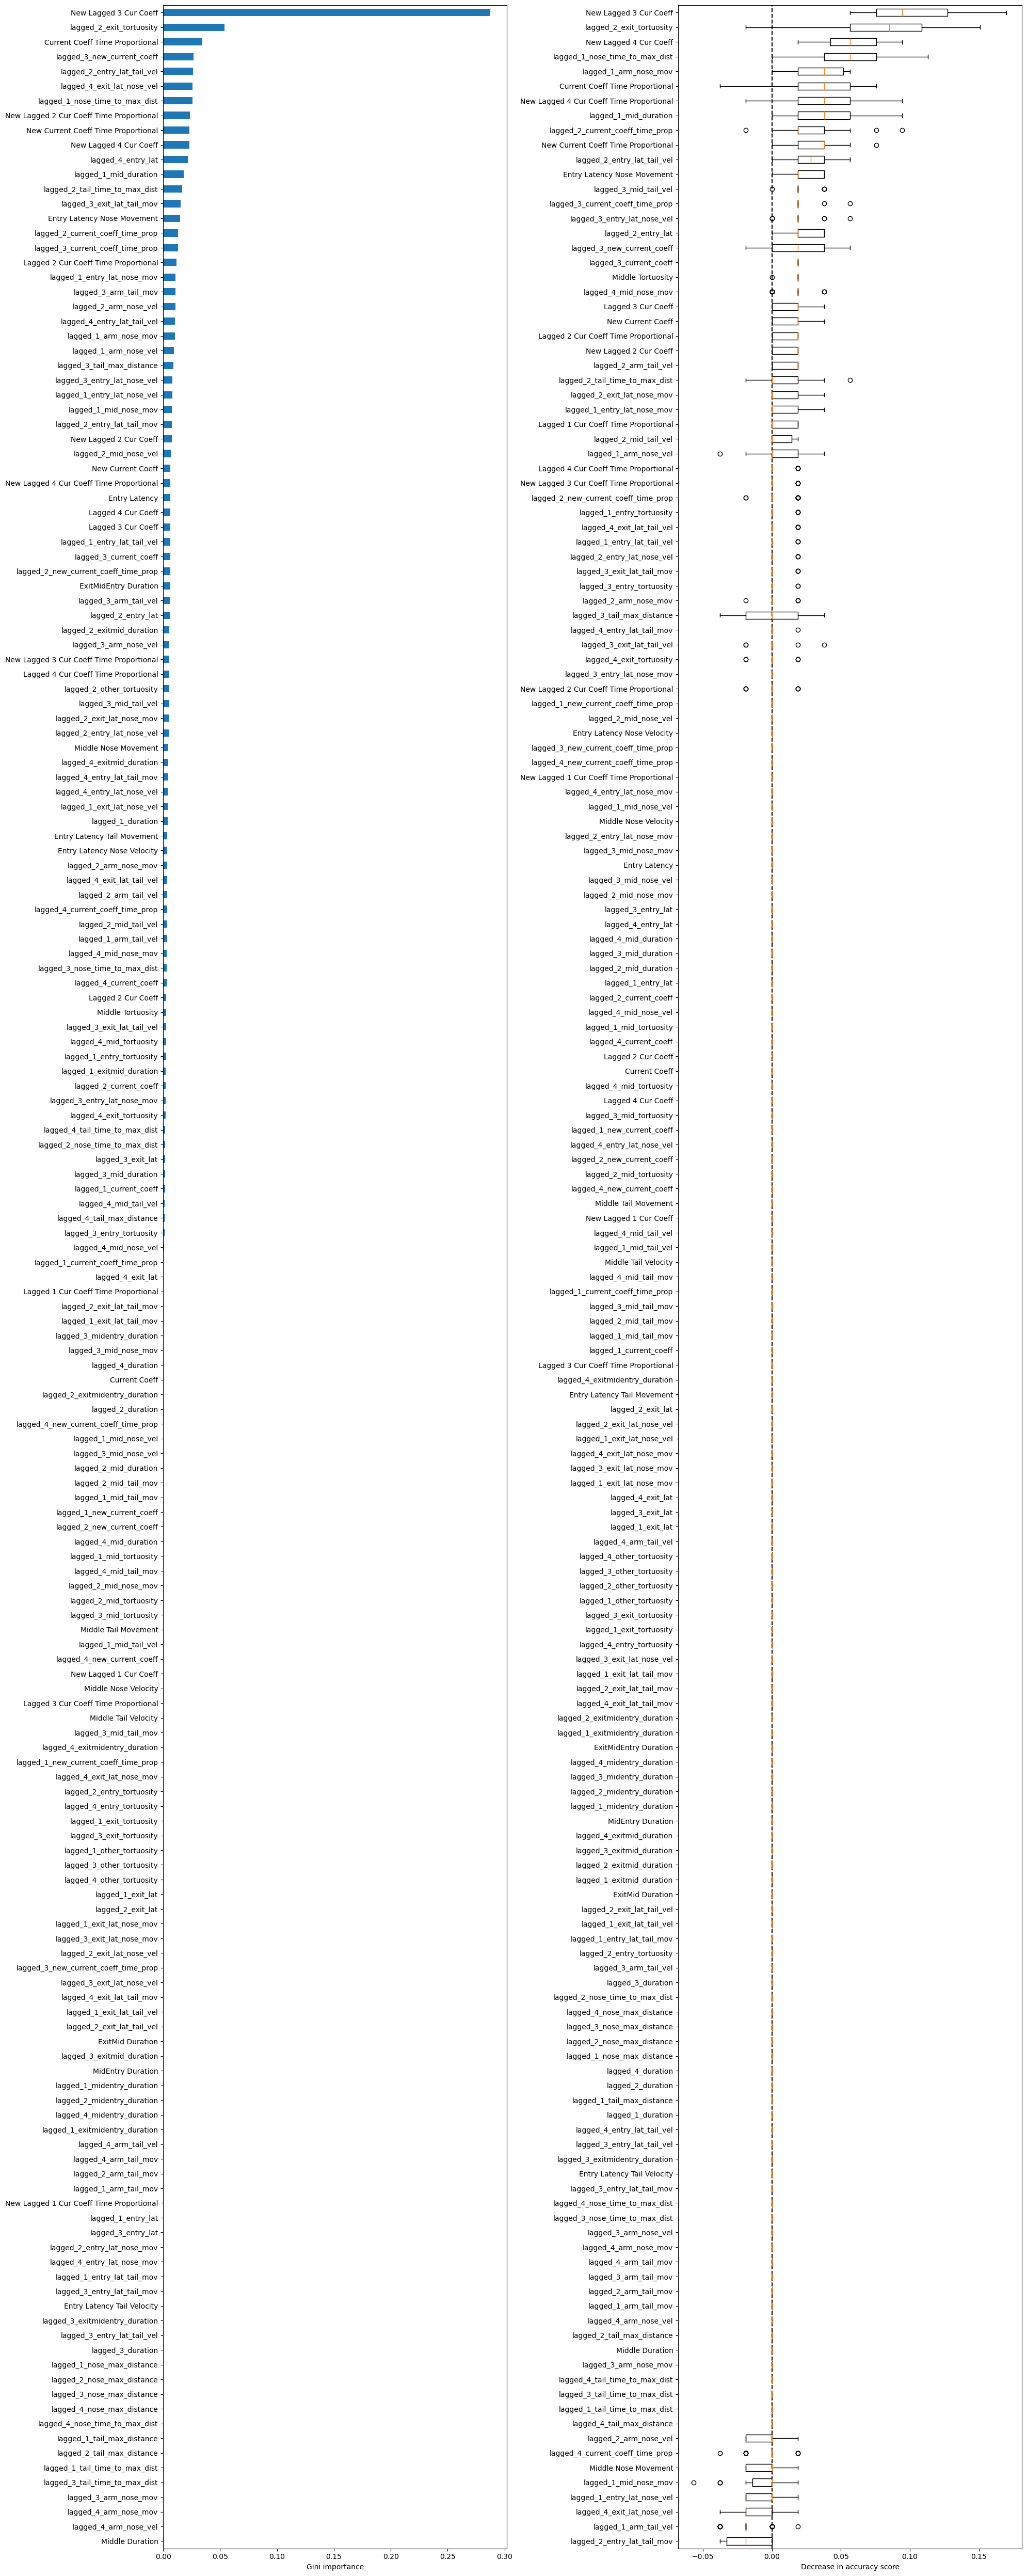

In [38]:
mdi_importances345 = pd.Series(mod.feature_importances_, index=x_main_3_4_5.columns)
tree_importance_sorted_idx345 = np.argsort(mod.feature_importances_)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 50))
mdi_importances345.sort_values().plot.barh(ax=ax1)
ax1.set_xlabel("Gini importance")
plot_permutation_importance(mod, X_test345, y_test345, x_main_3_4_5,ax2)
ax2.set_xlabel("Decrease in accuracy score")
#fig.suptitle(
#    "Impurity-based vs. permutation importances on multicollinear features (train set)"
#)
_ = fig.tight_layout()


#plt.savefig('Impurity-based_vs_permutation importances.png')